In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold 

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

## train/test split

In [3]:
# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the accuracy changes a lot
# this is why testing accuracy is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.97368421052631582

## KFold

In [4]:
kf = KFold(n_splits=5,random_state=2) 

In [5]:
acc=[]
for train_index, test_index in kf.split(X):
    
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
print acc

[1.0, 1.0, 0.83333333333333337, 0.93333333333333335, 0.80000000000000004]


#                              cross_val_score (shortcut method)
cross_val_score executes the first 4 steps of k-fold cross-validation steps which I have broken down to 7 steps here in detail

Split the dataset (X and y) into K=10 equal partitions (or "folds")

Train the KNN model on union of folds 2 to 10 (training set)

Test the model on fold 1 (testing set) and calculate testing accuracy

Train the KNN model on union of fold 1 and fold 3 to 10 (training set)

Test the model on fold 2 (testing set) and calculate testing accuracy

It will do this on 8 more times

When finished, it will return the 10 testing accuracy scores as a numpy array

In [15]:
# Cross-validation example: parameter tuning
# We want to choose the best tuning parameters that best generalize the data
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)

In [7]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[ 0.96666667  1.          0.93333333  0.96666667  1.        ]


In [8]:
print(scores.mean())

0.973333333333


## GOAL : To find the optimal value of K in KNN

In [9]:
# range of k we want to try
k_range = range(1, 31)
k_scores = []

In [10]:
for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
   
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())


print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


In [11]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

('Length of list', 30)
('Max of list', 0.98000000000000009)


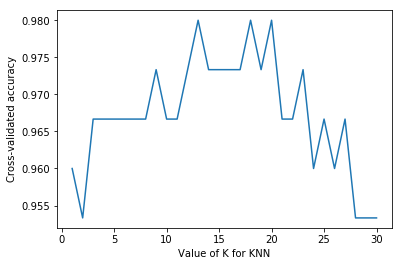

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')


The maximum cv accuracy occurs from k=13 to k=20

The general shape of the curve is an upside down yield

This is quite typical when examining the model complexity and accuracy

This is an example of bias-variance trade off

Low values of k (low bias, high variance)

The 1-Nearest Neighbor classifier is the most complex nearest neighbor model

It has the most jagged decision boundary, and is most likely to overfit

High values of k (high bias, low variance)
underfit

Best value is the middle of k (most likely to generalize out-of-sample data)
just right

The best value of k
Higher values of k produce less complex model
So we will choose 20 as our best KNN model

## model selection

In [13]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


We can conclude that KNN is likely a better choice than logistic regression